In [1]:
import pandas as pd

In [2]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing
from sklearn.cluster import KMeans

%matplotlib inline

In [3]:
data = pd.read_csv('health_data.csv')

In [4]:
# let's capitalize our columns
data.columns = map(str.upper, data.columns)

# let's drop no values
data = data.dropna()

In [5]:
data.head()

,BIO_SEX,AGE,TREG1,ALCEVR1,ALCPROBS1,MAREVER1,COCEVER1,INHEVER1,CIGAVAIL,DEP1,ESTEEM1,VIOL1,PASSIST,DEVIANT1,SCHCONN1,GPA1,EXPEL1,FAMCONCT,PARACTV,PARPRES
1,2.0,19.427397,1.0,1.0,1,0,0,0,1.0,17.0,35.0,1.0,0,5.0,22.0,2.333333,0.0,23.3,9.0,15.0
3,1.0,20.430137,1.0,0.0,0,1,1,1,1.0,19.0,47.0,4.0,1,4.0,19.0,2.000000,0.0,18.7,6.0,14.0
5,1.0,14.509589,0.0,0.0,0,0,0,0,0.0,8.0,41.0,3.0,0,0.0,27.0,2.666667,0.0,23.7,3.0,13.0
6,1.0,13.676712,0.0,0.0,0,0,0,0,1.0,4.0,42.0,5.0,0,7.0,18.0,2.500000,0.0,24.7,6.0,13.0
7,1.0,15.178082,1.0,1.0,0,1,0,0,1.0,4.0,40.0,8.0,1,6.0,20.0,1.500000,0.0,22.3,10.0,14.0


The goal could be to develop a few targeted interventions to improve academic achievement that are targeted to the needs of specific student population subgroups based on the characteristics of students in clusters. To do this we are going to use a subset of the variables from the dataset. 

# Meaning of the columns

In [6]:
# Alcprobs1 = alcohol problems and has values 0-6
# Deviant1 = deviant behavior
# Viol = Violent behavior scale
# dep = depression
# paractv = parental activity
# parpres = paraental presence
# famconct = family connectedness
# esteem = self esteem

In [7]:
# We will consider the following clustering variables
cluster=data[['ALCEVR1','MAREVER1','ALCPROBS1','DEVIANT1','VIOL1',\
            'DEP1','ESTEEM1','SCHCONN1','PARACTV', 'PARPRES','FAMCONCT']]

In cluster analysis variables with larger values contribute more to the distance calculations. Since our variables measured on different scales, we need to  standardize them prior to clustering, so that the solution is not influenced by variables measured on larger scales. We will  standardize the clustering variables to have a mean of 0, and a standard deviation of 1

In [8]:
# standardize clustering variables to have mean=0 and sd=1

cluster_s = cluster.copy()

cluster_s['ALCEVR1']=preprocessing.scale(cluster_s['ALCEVR1'].astype('float64'))
cluster_s['ALCPROBS1']=preprocessing.scale(cluster_s['ALCPROBS1'].astype('float64'))
cluster_s['MAREVER1']=preprocessing.scale(cluster_s['MAREVER1'].astype('float64'))
cluster_s['DEP1']=preprocessing.scale(cluster_s['DEP1'].astype('float64'))
cluster_s['ESTEEM1']=preprocessing.scale(cluster_s['ESTEEM1'].astype('float64'))
cluster_s['VIOL1']=preprocessing.scale(cluster_s['VIOL1'].astype('float64'))
cluster_s['DEVIANT1']=preprocessing.scale(cluster_s['DEVIANT1'].astype('float64'))
cluster_s['FAMCONCT']=preprocessing.scale(cluster_s['FAMCONCT'].astype('float64'))
cluster_s['SCHCONN1']=preprocessing.scale(cluster_s['SCHCONN1'].astype('float64'))
cluster_s['PARACTV']=preprocessing.scale(cluster_s['PARACTV'].astype('float64'))
cluster_s['PARPRES']=preprocessing.scale(cluster_s['PARPRES'].astype('float64'))

In this example we will use it to calculate the average distance of the observations from the cluster centroids. Later, we can plot this average distance measure to help us figure out how many clusters may be optimal, then we will create an object called clusters that will include numbers in the range between 1 and 10. We will use this object when we specify the number of clusters we want to test, which will give us the cluster solutions for k equals 1 to k equals 12 clusters. In the next line of code we create an object called mean dist that will be used to store the average distance values that we will calculate for the 1 to 12 cluster solutions. The for k in clusters: code tells Python to run the cluster analysis code below for each value of k in the cluster's object

In [9]:
# split data into train and test sets
cluster_train, cluster_test = train_test_split(cluster_s, test_size=0.3, random_state=222)

In [10]:
print cluster_test.shape, cluster_train.shape

(1381, 11) (3220, 11)


- mean_dist.append calculates the average of the sum of the distances between each observation in the cluster centroids. The formula first calculates the distance between each observation and the cluster centroids. We use the cdist function from the scipy spacial distance library to calculate the distance. 

- The word Euclidean, tells Python to use cdist to calculate the distance between each observation in the cluster_train data set in the cluster centroids using Euclidean distance, then we use np.min function to determine the smallest or minimum difference for each observation among the cluster centroids. 

- Axis equals 1 means that the minimum should be determined by examining the distance between the observation and each centroid taking the smallest distance as the value of the minimum, then we use the sum function to sum the minimum distances across all observations. 

- Finally, the / cluster_train.shape[0] = which is number of observations in cluster_train dataset.



In [11]:
# k-means cluster analysis for 1-10 clusters 

from scipy.spatial.distance import cdist

clusters = range(1,11)
mean_dist=[]

for k in clusters:
    model= KMeans(n_clusters=k)
    model.fit(cluster_train)
    #clusassign=model.predict(clus_train)
    mean_dist.append(sum(np.min(cdist(cluster_train, model.cluster_centers_, 'euclidean'),\
                                axis=1)) / cluster_train.shape[0])

In [12]:
print cluster_train.shape[0]

3220


- Now that we have the average distance calculated for each of the 1 to 12 cluster solutions we can plot the elbow curve using the map plot lib plot function that we imported as plt. 

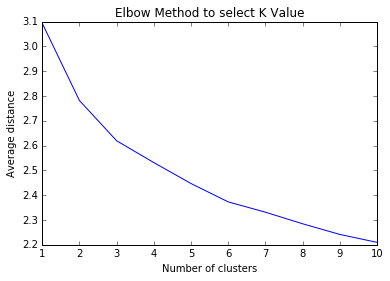

In [13]:
"""
Now, let's plot average distance from observations from the cluster centroid
using the Elbow Method to identify number of clusters to choose
"""

plt.plot(clusters, mean_dist)
plt.xlabel('Number of clusters')
plt.ylabel('Average distance')
plt.title('Elbow Method to select K Value')

- So what this plot shows is the decrease in the average minimum distance of the observations from the cluster centroids for each of the clusters. We can see that the average distance decreases as the number of clusters increases. Since the goal of cluster analysis is to minimize the distance between observations and their assigned clusters we want to chose the fewest numbers of clusters that provides a low average distance.

- What we're looking for in this plot is a bend in the elbow that kind of shows where the average distance value might be leveling off such that adding more clusters doesn't decrease the average distance as much. You can see how subjective this is though. 

- There appears to be a couple of bends at the line at two clusters and at three clusters, but it's not very clear. To help us figure out which of the solutions is best we should further examine the cluster solutions for at least the two and three cluster solutions to see whether they do not overlap, whether the patterns of means on the clustering variables are unique and meaningful, and whether there are significant differences between the clusters on our external validation variable GPA. 

- The first thing we want to try is to graph the clusters in a scatter plot to see whether or not they overlap. However, with 11 clustering variables that means we have 11 dimensions, which would be impossible to visualize. A scatter plot will work to visualize a few dimensions, but not 11 dimensions. 

- So what we're going to use is use canonical discriminate analysis, which is a data reduction technique that creates a smaller number of variables that are linear combinations of the 11 clustering variables. 

- The new variables, called canonical variables, are ordered in terms of the proportion of variance and the clustering variables that is accounted for by each of the canonical variables. 

- So the first canonical variable will count for the largest proportion of the variance. The second canonical variable will account for the next largest proportion of variance, and so on. Usually, the majority of the variance in the clustering variables will be accounted for by the first couple of canonical variables and those are the variables that we can plot. 

- In Python, we can use the PCA function to conduct the canonical discriminate analysis. So the first thing we need to do is import that function, then we create an object that we are going to call PCA_2. 

- PCA(2) asks Python to return the two first canonical variables. Then we will create a matrix called plot_columns that will include the two canonical variables estimated by the canonical discriminate analysis. 

- PCA_2.fit asks Python to fit the canonical discriminate analysis that we specified with the PCA command, and the _transform applies the canonical discriminate analysis to the cluster_train data set to calculate the canonical variables.

- We will plot the two canonical variables by the cluster assignment values from the 3 cluster solution in a scatter plot. In parentheses, x=plot_columns with a colon and 0 separated by a comma, tells Python to plot the first canonical variable, which is in the first column in the plot_column matrix on the x axis, y=plot_columns with a colon and 1 separated by a comma tells Python to plot the second canonical variable on the y axis. 

- Model1.labels_ contains the cluster assignment variable from the 3 cluster solution. So c=model3.labels_ tells python to color code the points for each of the three clusters. 



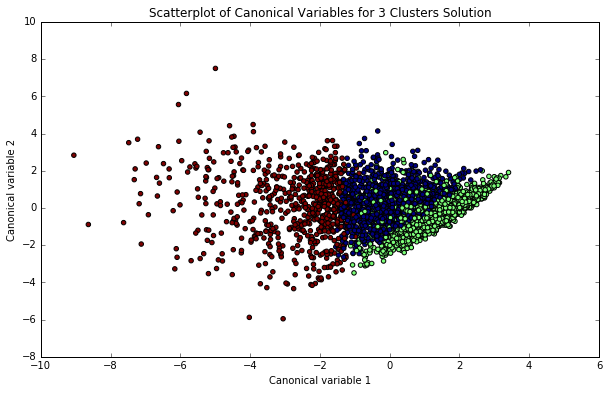

In [14]:
# Interpret 3 cluster solution
model1=KMeans(n_clusters=3)
model1.fit(cluster_train)

plt.figure(figsize=(10,6))

from sklearn.decomposition import PCA
pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(cluster_train)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=model1.labels_,)
plt.xlabel('Canonical variable 1')
plt.ylabel('Canonical variable 2')
plt.title('Scatterplot of Canonical Variables for 3 Clusters Solution')
plt.show()

- In the 3 clusters solution scatter plot, the three clusters are densely packed, meaning that the observations within the clusters are pretty highly correlated with each other, and within cluster variance is relatively low. 

- But they appear to have a good deal of overlap, meaning that there is not good separation between these two clusters. On the other hand, this cluster here shows better separation, but the observations are more spread out indicating less correlation among the observations and higher within cluster variance. This suggests that the two cluster solution might be better, meaning that it would be especially important to further evaluate the two cluster solution as well. 

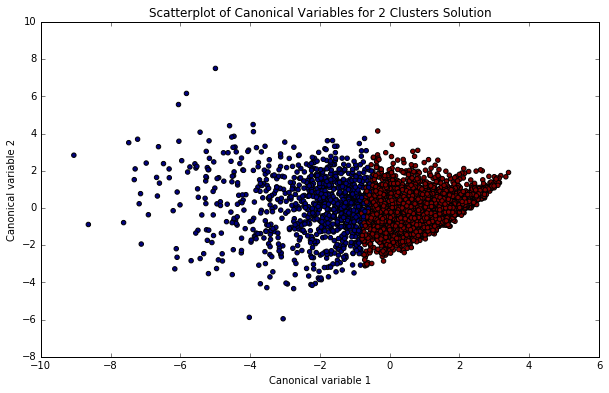

In [15]:
# Interpret 2 cluster solution

model2=KMeans(n_clusters=2)
model2.fit(cluster_train)

plt.figure(figsize=(10,6))

from sklearn.decomposition import PCA
pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(cluster_train)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=model2.labels_,)

plt.xlabel('Canonical variable 1')
plt.ylabel('Canonical variable 2')
plt.title('Scatterplot of Canonical Variables for 2 Clusters Solution')
plt.show()

- What this shows is that these two clusters are densely packed, meaning that the observations within the clusters are pretty highly correlated with each other, and within cluster variance is relatively low. But they appear to have a good deal of overlap, meaning that there is not good separation between these two clusters. 

- On the other hand, this cluster here shows better separation, but the observations are more spread out indicating less correlation among the observations and higher within cluster variance. This suggests that the two cluster solution might be better, meaning that it would be especially important to further evaluate the two cluster solution as well.

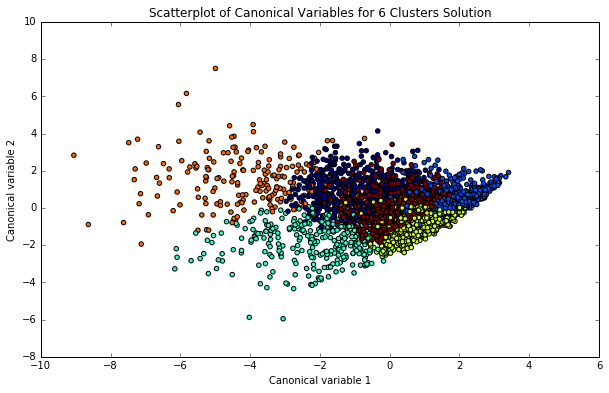

In [16]:
# Interpret 6 cluster solution

model3=KMeans(n_clusters=6)
model3.fit(cluster_train)

plt.figure(figsize=(10,6))

from sklearn.decomposition import PCA
pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(cluster_train)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=model3.labels_,)

plt.xlabel('Canonical variable 1')
plt.ylabel('Canonical variable 2')
plt.title('Scatterplot of Canonical Variables for 6 Clusters Solution')
plt.show()

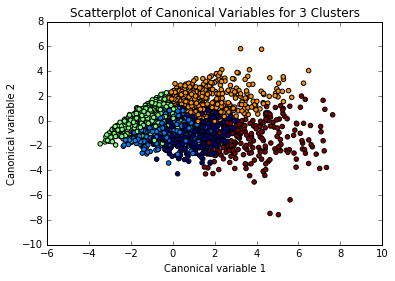

In [35]:
# Interpret 3 cluster solution
model3=KMeans(n_clusters=5)
model3.fit(clus_train)
#clusassign=model3.predict(clus_train)
# plot clusters

from sklearn.decomposition import PCA
pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(clus_train)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=model3.labels_,)
plt.xlabel('Canonical variable 1')
plt.ylabel('Canonical variable 2')
plt.title('Scatterplot of Canonical Variables for 3 Clusters')
plt.show()

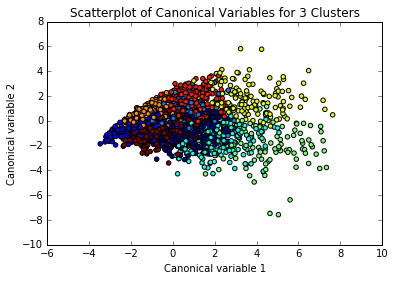

In [36]:
# Interpret 3 cluster solution
model3=KMeans(n_clusters=9)
model3.fit(clus_train)
#clusassign=model3.predict(clus_train)
# plot clusters

from sklearn.decomposition import PCA
pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(clus_train)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=model3.labels_,)
plt.xlabel('Canonical variable 1')
plt.ylabel('Canonical variable 2')
plt.title('Scatterplot of Canonical Variables for 3 Clusters')
plt.show()

In [ ]:
data = pd.read_csv("health_data.csv")

#upper-case all DataFrame column names
data.columns = map(str.upper, data.columns)

# Data Management

data = data.dropna()

# subset clustering variables
cluster=data[['ALCEVR1','MAREVER1','ALCPROBS1','DEVIANT1','VIOL1',
'DEP1','ESTEEM1','SCHCONN1','PARACTV', 'PARPRES','FAMCONCT']]
cluster.describe()

# standardize clustering variables to have mean=0 and sd=1
clustervar=cluster.copy()
clustervar['ALCEVR1']=preprocessing.scale(clustervar['ALCEVR1'].astype('float64'))
clustervar['ALCPROBS1']=preprocessing.scale(clustervar['ALCPROBS1'].astype('float64'))
clustervar['MAREVER1']=preprocessing.scale(clustervar['MAREVER1'].astype('float64'))
clustervar['DEP1']=preprocessing.scale(clustervar['DEP1'].astype('float64'))
clustervar['ESTEEM1']=preprocessing.scale(clustervar['ESTEEM1'].astype('float64'))
clustervar['VIOL1']=preprocessing.scale(clustervar['VIOL1'].astype('float64'))
clustervar['DEVIANT1']=preprocessing.scale(clustervar['DEVIANT1'].astype('float64'))
clustervar['FAMCONCT']=preprocessing.scale(clustervar['FAMCONCT'].astype('float64'))
clustervar['SCHCONN1']=preprocessing.scale(clustervar['SCHCONN1'].astype('float64'))
clustervar['PARACTV']=preprocessing.scale(clustervar['PARACTV'].astype('float64'))
clustervar['PARPRES']=preprocessing.scale(clustervar['PARPRES'].astype('float64'))

# split data into train and test sets
clus_train, clus_test = train_test_split(clustervar, test_size=.3, random_state=123)

# k-means cluster analysis for 1-9 clusters                                                           
from scipy.spatial.distance import cdist
clusters=range(1,10)
meandist=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(clus_train)
    #clusassign=model.predict(clus_train)
    meandist.append(sum(np.min(cdist(clus_train, model.cluster_centers_, 'euclidean'), axis=1)) 
    / clus_train.shape[0])

"""
Plot average distance from observations from the cluster centroid
to use the Elbow Method to identify number of clusters to choose
"""

plt.plot(clusters, meandist)
plt.xlabel('Number of clusters')
plt.ylabel('Average distance')
plt.title('Selecting k with the Elbow Method')

# Interpret 3 cluster solution
model3=KMeans(n_clusters=3)
model3.fit(clus_train)
#clusassign=model3.predict(clus_train)
# plot clusters

from sklearn.decomposition import PCA
pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(clus_train)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=model3.labels_,)
plt.xlabel('Canonical variable 1')
plt.ylabel('Canonical variable 2')
plt.title('Scatterplot of Canonical Variables for 3 Clusters')
plt.show()
